In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import torch
import torch.nn as nn

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


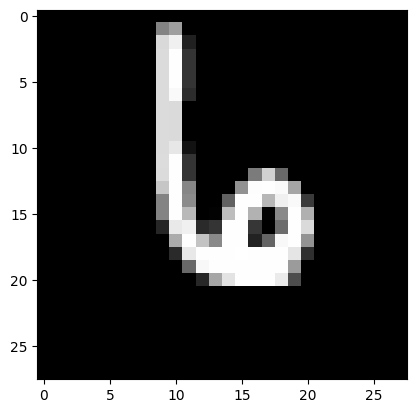

In [4]:
pixels = np.array(train.iloc[123])
pixels = pixels[1:]
pixels = pixels.reshape((28, 28))

plt.imshow(pixels, cmap='grey')

In [5]:
X_train = np.array(train.drop('label', axis=1)) / 255
y_train = np.array(train['label'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=2026)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(33600, 784)
(33600,)
(8400, 784)


In [6]:
x0 = np.random.normal(size=(784, 10)) / np.sqrt(784)

In [7]:
neourons = torch.tensor(x0, requires_grad=True)

In [8]:
X = torch.tensor(X_train)
y = torch.tensor(y_train)

optimizer = torch.optim.SGD(params=[neourons], lr = 1)
loss_history = []
epochs = 200

for i in range(epochs):
    predictions = X @ neourons
    loss = torch.nn.functional.cross_entropy(predictions, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_history.append(loss.data.numpy())


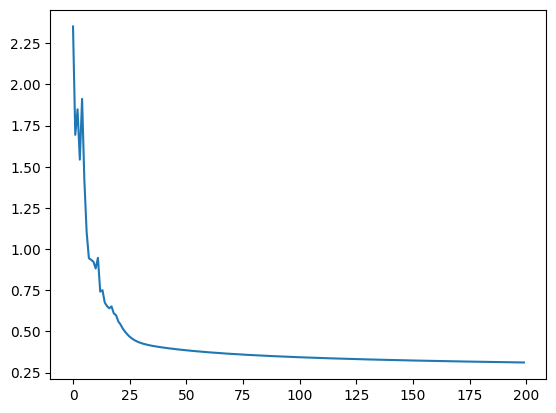

In [9]:
plt.plot(loss_history)

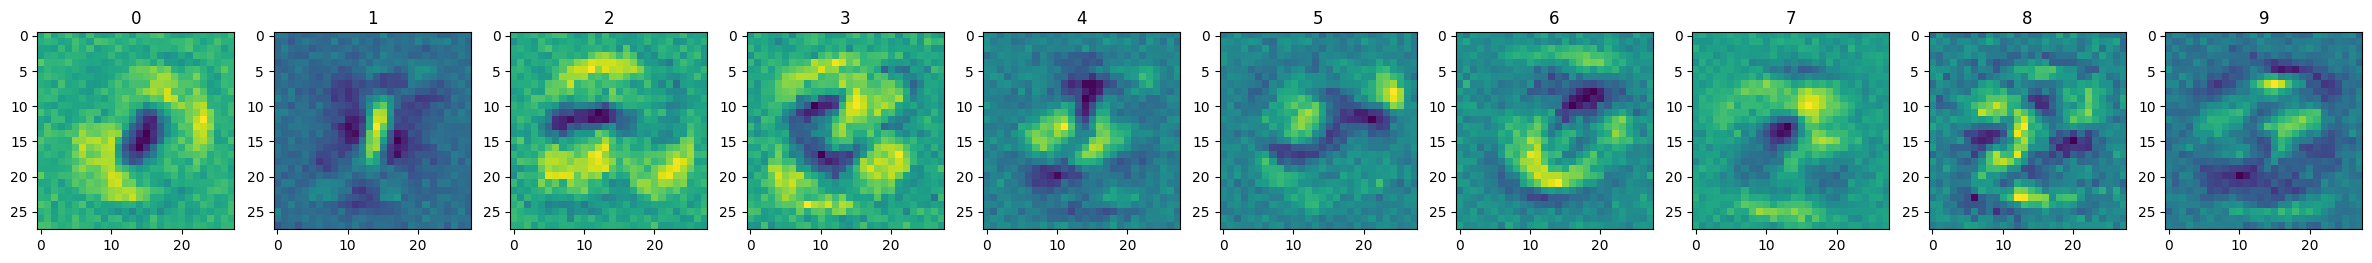

In [10]:
fig, axes = plt.subplots(1, 10, figsize=(30,30))

for i in range(10):
    axes[i].set_title(i)
    neuron_img = neourons[:,i].data.numpy().reshape(28, 28)
    axes[i].imshow(neuron_img)

In [11]:
def sigmoid(x):
    ex = np.exp(x)
    return ex / 1+ ex

digit_probabilities = sigmoid((X @ neourons).data.numpy())
print(digit_probabilities.shape)

(33600, 10)


In [12]:
from sklearn.metrics import f1_score

predictions = np.argmax(digit_probabilities, axis=1)
print(predictions.shape)
print("Train F1: ", f1_score(y_train, predictions, average='macro'))

(33600,)
Train F1:  0.9115724055750292


In [13]:
import torch.nn.functional as F
class MyFirstNN(nn.Module):
    def __init__(self, n_hidden_neurons=200):
        super().__init__()

        # init_1 = np.random.normal(size=(784, n_hidden_neurons)) / np.sqrt(784)
        # self.neurons_layer1 = torch.tensor(init_1, requires_grad=True)
        # self.neurons_layer1 = nn.Parameter(self.neurons_layer1)
        self.neurons_layer1 = nn.Linear(784, n_hidden_neurons)
        # init_2 = np.random.normal(size=(n_hidden_neurons, 10)) / np.sqrt(n_hidden_neurons)
        # self.neurons_layer2 = torch.tensor(init_2, requires_grad=True)
        # self.neurons_layer2 = nn.Parameter(self.neurons_layer2)
        self.neurons_layer2 = nn.Linear(n_hidden_neurons, 10)

    def forward(self, x):
        # h = x @ self.neurons_layer1
        h =  self.neurons_layer1(x)
        # h = torch.relu(h)
        h = F.relu(h)
        # out = h @ self.neurons_layer2(h)
        out = self.neurons_layer2(h)
        return out

In [14]:
model = MyFirstNN()

optimizer = torch.optim.Adam(params=model.parameters(), lr = 0.001)

In [15]:
from tqdm import tqdm

N_EPOCHS = 50
X_tr = torch.tensor(X_train[1000:], dtype=torch.float32)
y_tr = torch.tensor(y_train[1000:], dtype=torch.long)
X_dev = torch.tensor(X_train[:1000], dtype=torch.float32)
y_dev = torch.tensor(y_train[:1000], dtype=torch.long)

train_loss_history = []
dev_loss_history = []

for i in tqdm(range(N_EPOCHS)):
    predictions = model(X_tr)
    loss = F.cross_entropy(predictions, y_tr)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss_history.append(loss.item())

    if i % 10 == 0:
        predictions = model(X_dev)
        loss = F.cross_entropy(predictions, y_dev)
        dev_loss_history.append(loss.item())

100%|██████████| 50/50 [00:04<00:00, 11.34it/s]


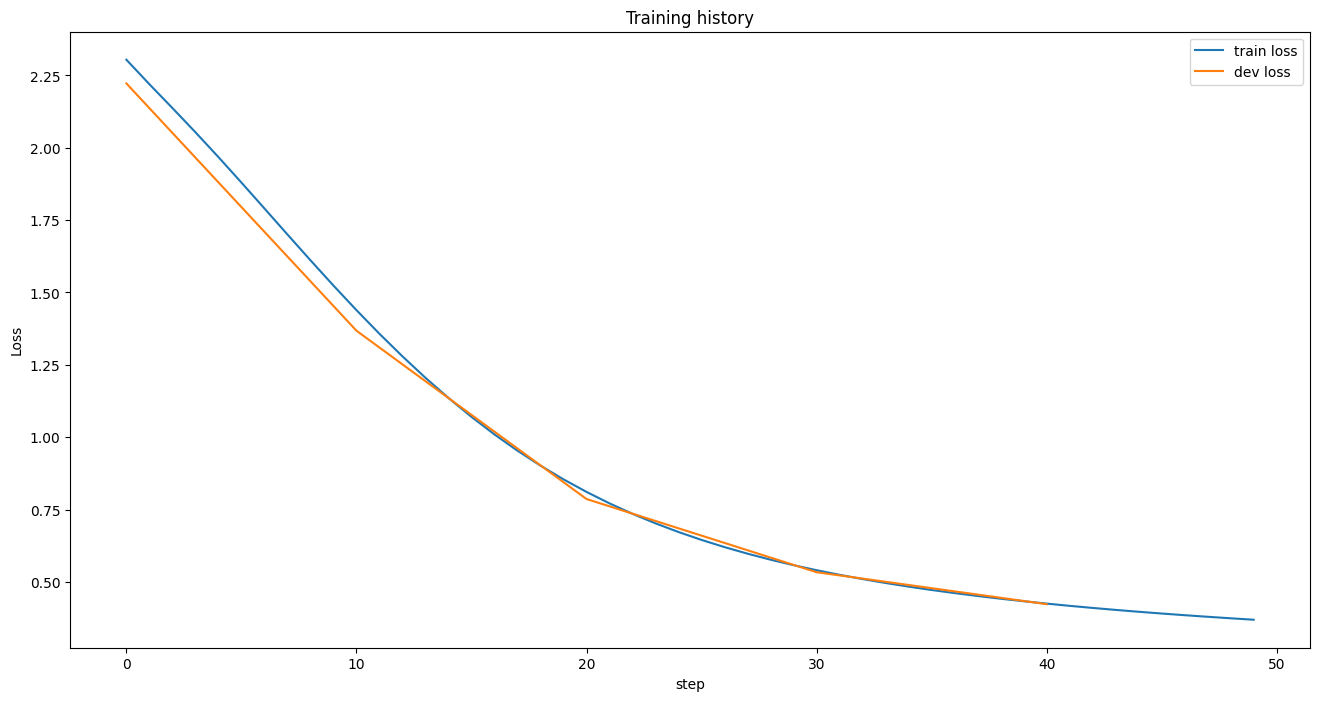

In [16]:
plt.figure(figsize=(16, 8))
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('step')
plt.plot(range(N_EPOCHS), train_loss_history, label='train loss')
plt.plot(range(N_EPOCHS)[::10], dev_loss_history, label='dev loss')
plt.legend()

In [18]:
digit_probabilities = model(X_dev).detach().numpy()

from sklearn.metrics import classification_report

predictions = np.argmax(digit_probabilities, axis=1)
print(classification_report(y_dev.detach().cpu().numpy(), predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        94
           1       0.91      0.97      0.94       110
           2       0.93      0.85      0.89       116
           3       0.89      0.89      0.89       107
           4       0.90      0.87      0.88       112
           5       0.91      0.82      0.87        90
           6       0.87      0.92      0.89        77
           7       0.94      0.89      0.92       113
           8       0.85      0.89      0.87        99
           9       0.78      0.84      0.81        82

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



In [28]:
class MySecondNN(nn.Module):
    def __init__(self, n_hidden_neurons=200):
        super().__init__()
        self.linear1 = nn.Linear(784, 256)
        self.linear2 = nn.Linear(256, n_hidden_neurons)
        self.linear3 = nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.linear4 = nn.Linear(n_hidden_neurons, 10)
        self.ReLU = nn.ReLU(inplace=True)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = self.linear4(x)
        return x

In [29]:
model = MySecondNN().cuda()

optimizer = torch.optim.Adam(params=model.parameters(), lr = 0.001)

In [30]:
N_EPOCHS = 150
X_tr = torch.tensor(X_train[1000:], dtype=torch.float32).cuda()
y_tr = torch.tensor(y_train[1000:], dtype=torch.long).cuda()
X_dev = torch.tensor(X_train[:1000], dtype=torch.float32).cuda()
y_dev = torch.tensor(y_train[:1000], dtype=torch.long).cuda()

train_loss_history = []
dev_loss_history = []
ce = nn.CrossEntropyLoss()

for i in tqdm(range(N_EPOCHS)):
    predictions = model(X_tr)
    loss = ce(predictions, y_tr)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss_history.append(loss.item())

    if i % 10 == 0:
        predictions = model(X_dev)
        loss = ce(predictions, y_dev)
        dev_loss_history.append(loss.item())

  0%|          | 0/150 [00:00<?, ?it/s]

100%|██████████| 150/150 [00:01<00:00, 130.42it/s]


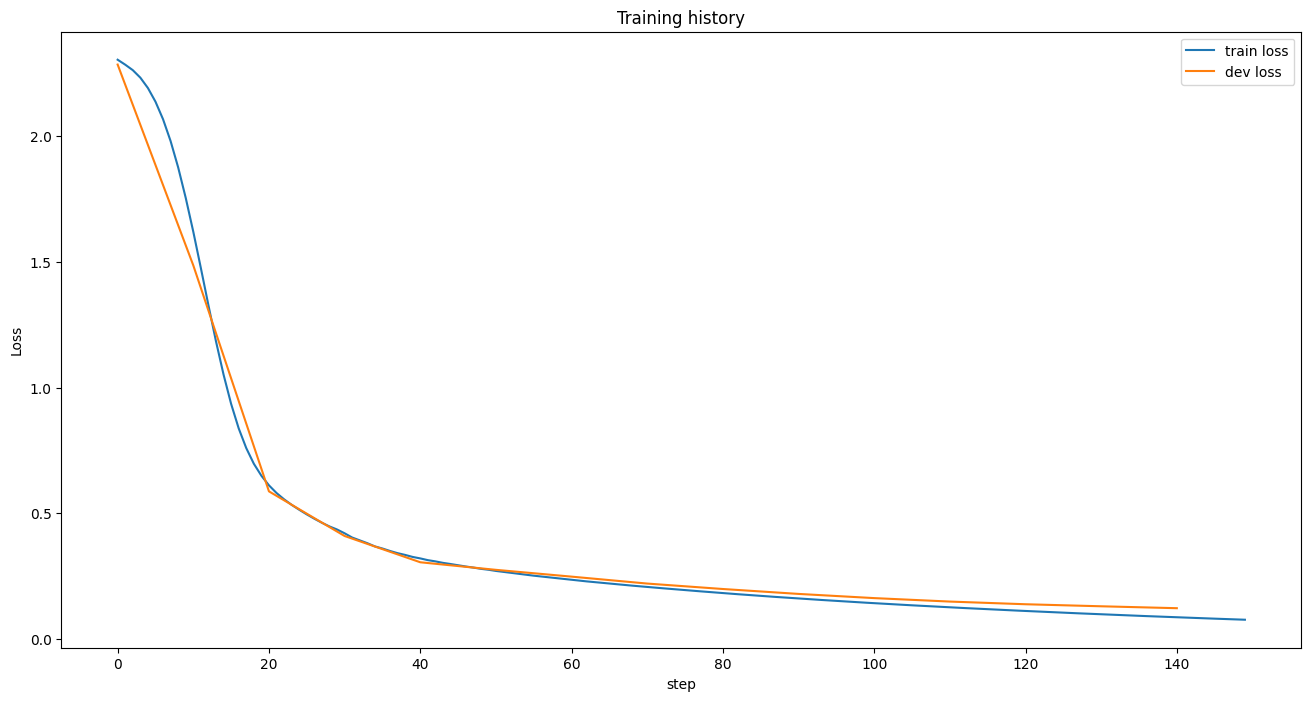

In [31]:
plt.figure(figsize=(16, 8))
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('step')
plt.plot(range(N_EPOCHS), train_loss_history, label='train loss')
plt.plot(range(N_EPOCHS)[::10], dev_loss_history, label='dev loss')
plt.legend()

In [36]:
digit_probabilities = model(X_dev).detach().cpu().numpy()

from sklearn.metrics import classification_report

predictions = np.argmax(digit_probabilities, axis=1)
print(classification_report(y_dev.detach().cpu().numpy(), predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        94
           1       0.98      0.98      0.98       110
           2       0.97      0.96      0.97       116
           3       0.94      0.93      0.94       107
           4       0.98      0.96      0.97       112
           5       0.97      0.94      0.96        90
           6       0.96      1.00      0.98        77
           7       0.95      0.93      0.94       113
           8       0.97      0.97      0.97        99
           9       0.88      0.95      0.91        82

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000

